## PROBLEM STATEMENT: 
Do smokers have a different lung capacity as compared to non-smokers?

### Contents:
1. Load Data & Manipulate
2. Visualize Association b/t Groups
3. Test of Equal/Unequal Variance
4. Hypothesis Test (exploring various libraries)
5. Conclusion

In [1]:
import pandas as pd
import numpy as np
#dataviz
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
#stats libs
from scipy import stats as scipy_stats

In [2]:
file = 'LungCapData.txt'

df = pd.read_csv(file, sep='\t')
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


**Visualize Association between groups**

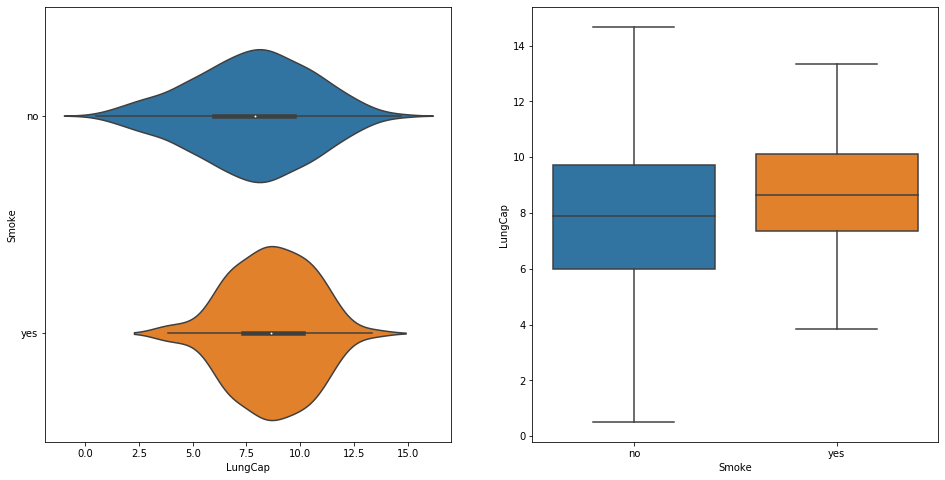

In [16]:
fig = plt.figure(figsize=(16,8)) #create figure

#setup subplots for each plot
ax0 = fig.add_subplot(1, 2, 1) #first subplot, row 1, col1
ax1 = fig.add_subplot(1, 2, 2) #first subplot, row 2, col 2

#Add violinplot to ax0
sns.violinplot(x='LungCap', y='Smoke', orient='h', data=df, ax=ax0)

#Add Boxplot to ax1
sns.boxplot(x='Smoke', y='LungCap', orient='v', data=df, ax=ax1)

plt.show()

Prepare groups for analysis

In [4]:
#Create group objects for both categories
grp = df.groupby('Smoke')['LungCap']

smoke_yes = grp.get_group('yes')
smoke_no = grp.get_group('no')

In [12]:
#Find SD for both ind groups
sd_no, sd_yes = df.groupby('Smoke')['LungCap'].std()

print(f'SD for non-smokers is {sd_no:.2f}')
print(f'SD for smokers is {sd_yes:.2f}')

SD for non-smokers is 2.73
SD for smokers is 1.88


***

### **Testing for Equal & Unqual Variance**

We can assume equal/unequal variance in 3 main ways:
>1) Eyeball of boxplot - does the variability appear to be the same among our samples?
Above it appears that non-smokers have more variance than smokers
<br>2) Ratio of variances: (Large var:Small var)
<br>3) Levene's Hypothesis Test

**#2**

In [14]:
#2. Ratio of Variances w/numpy.var

var_yes = np.var(smoke_yes)
var_no = np.var(smoke_no)

print(f'\nVariance of smokers {var_yes:.2f}\nVariance of non-smokers {var_no:.2f}')


Variance of smokers 3.50
Variance of non-smokers 7.42


In [118]:
print(f'A ratio of {var_no / var_yes:.2f} indicates we should assume non-equal variances')

A ratio of 2.12 indicates we should assume non-equal variances


**#3**

In [87]:
#3. Levene's test is used to test the null hyp that the population variances are equal
tstat, pvalue = stats.levene(smoke_yes, smoke_no)
print(tstat, '-', pvalue)
print(f'\nOur p-value of {pvalue:f} is strong evidence against the null that the variance between both groups is equal')

12.955230543446781 - 0.00034080246885798225

Our p-value of 0.000341 is strong evidence against the null that the variance between both groups is equal


**Conclusion of Equal/Unequal Variances** - Either of the 3 methods supports the claim that we should assume unequal variance
***

### Hypothesis Test - Assuming Unequal Variance

One of 2 main ways:
- T-Test with Scipy
- T-Test with Statsmodels

In [109]:
df.groupby('Smoke')['LungCap'].describe()

,count,mean,std,min,25%,50%,75%,max
Smoke,,,,,,,,
no,648.0,7.770188,2.726113,0.507,6.00,7.90,9.73125,14.675
yes,77.0,8.645455,1.882894,3.850,7.35,8.65,10.12500,13.325


In [171]:
#Run Independent Two Sample T-Test using Scipy
t_stat, p_value = scipy_stats.ttest_ind(smoke_yes, smoke_no, equal_var=False) #default conf = 95%

print(f'T-Stat = {t_stat:.2f}')
print(f'P_Value = {p_value:.5f}')


T-Stat = 3.65
P_Value = 0.00039


In [104]:
#Stats model gives us a more rich output
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(smoke_yes, smoke_no, usevar='unequal') #outputs tstat, pvalue, degrees of freedom respectively

(3.649750522823782, 0.0003927364779843293, 117.71871064770065)

**Conclusion:** 

In [139]:
print(f'The p-value of {pvalue:.5f}, well below our alpha threshold of .05 suggests the difference in lung capacity\nbetween smokers and non-smokers is significant.Smokers have a mean lung capacity of {smoke_yes.mean():.2f} and SD of {sd_yes:.2f} compared to\nnon-smokers with a mean of {smoke_no.mean():.2f} and SD of {sd_no:.2f}.')

The p-value of 0.00034, well below our alpha threshold of .05 suggests the difference in lung capacity
between smokers and non-smokers is significant.Smokers have a mean lung capacity of 8.65 and SD of 1.88 compared to
non-smokers with a mean of 7.77 and SD of 2.73.


***
References: Data & Tutorial in R provided by MarinStatsLectures:

https://www.youtube.com/playlist?list=PLqzoL9-eJTNBq-C2sh46hYIlZYJ0Z1cIB